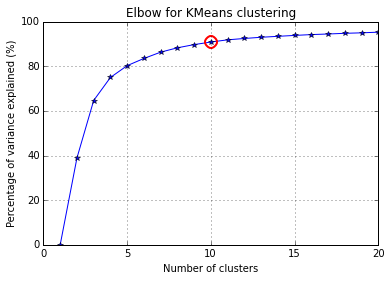

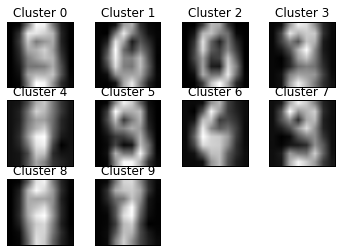

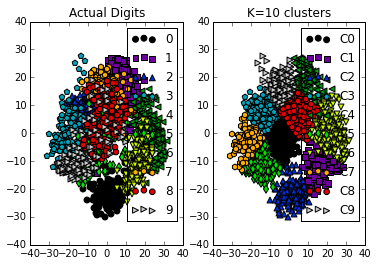

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from sklearn.decomposition import RandomizedPCA
%matplotlib inline

##### data #####
# load digits dataset
data = datasets.load_digits()
t = data['target']

# perform PCA dimensionality reduction
pca = RandomizedPCA(n_components=2).fit(data['data'])
X = pca.transform(data['data'])

##### cluster data into K=1..20 clusters #####
K_MAX = 20
KK = range(1,K_MAX+1)

KM = [kmeans(X,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares

##### plots #####
kIdx = 9        # K=10
clr = cm.spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

# show centroids for K=10 clusters
plt.figure()
for i in range(kIdx+1):
    img = pca.inverse_transform(centroids[kIdx][i]).reshape(8,8)
    ax = plt.subplot(3,4,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap=cm.gray)
    plt.title( 'Cluster %d' % i )

# compare K=10 clustering vs. actual digits (PCA projections)
fig = plt.figure()
ax = fig.add_subplot(121)
for i in range(10):
    ind = (t==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], marker=mrk[i], label='%d'%i)
plt.legend()
plt.title('Actual Digits')
ax = fig.add_subplot(122)
for i in range(kIdx+1):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], marker=mrk[i], label='C%d'%i)
plt.legend()
plt.title('K=%d clusters'%KK[kIdx])

plt.show()